In [1]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import  ColumnDataSource,Range1d, LabelSet, Label
import string
import re
import collections

In [2]:
data_set = pd.read_csv('Outputs/Quiet_book.csv')

In [3]:
data_set_temp = data_set.copy()

In [4]:
data_set_temp.head(5)

,Star_count,Heading,Review
0,5,Amazing book!,"This is one of the best books that I've read, ..."
1,5,I appreciate silence!,I loved this book! It's all about introverts i...
2,3,Quietly making Noise!,This book found its way to my library through ...
3,5,Masterpiece on this subject: Kudos to the author,First of all I would like to salute the author...
4,5,reader's review,this book is no novel let me tell you or is it...


In [5]:
star_count = data_set_temp.groupby(['Star_count']).count()['Review']
x_value=[1,2,3,4,5]

In [6]:
output_notebook()

Loading BokehJS ...

In [46]:
from bokeh.models import HoverTool
from bokeh.transform import linear_cmap
from bokeh.models import Button
from bokeh.models import *

#Implementing column data source
data = {'x_values': x_value,
        'y_values': star_count}

col_datasrc = ColumnDataSource(data)

p = figure(title='Star Ratings',plot_width=450, plot_height=450, background_fill_color='#ffffb3', background_fill_alpha=0.9 ,x_axis_label = 'Stars', y_axis_label = 'Count')

labels = LabelSet(x='x_values', y='y_values', text='y_values', level='glyph',x_offset=0, y_offset=0, source=col_datasrc, render_mode='canvas', text_align='center' , text_font_size='10pt')

p.vbar(x='x_values', width=0.5, bottom=0, top='y_values', line_color='white',source=col_datasrc, fill_color='#6e0d25')
p.add_layout(labels)
show(p)

In [8]:
#Text cleaner

#Contractions Map
contraction_map = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"how're": "how are",
"you've": "you have"
}

In [9]:
def expand_contractions(text, contraction_mapping=contraction_map):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [10]:
def text_cleaner(input_text):
    #input_text=input_text.lower()
    input_text = re.sub('^rt', '', input_text)
    input_text = re.sub('\[.*?\]', '', input_text)
    input_text = re.sub(r"http\S+",'',input_text)
    input_text = re.sub('<.*?>+', '', input_text)
    input_text = re.sub('@\w+', '', input_text)
    input_text = re.sub('[%s]' % re.escape(string.punctuation), '', input_text)
    input_text = re.sub('\n', '', input_text)
    input_text = re.sub('\w*\d\w*', '', input_text)
    return input_text

In [11]:
#Review cleaning
#Lower the text
data_set_temp['Review_lower'] = data_set_temp['Review'].apply(lambda x:x.lower())

In [12]:
#Expand contractions
data_set_temp['No_Contractions'] = data_set_temp['Review_lower'].apply(lambda x:expand_contractions(x))

In [13]:
#Remove punctuations, URLs, etc
data_set_temp['Cleaned_text'] = data_set_temp['No_Contractions'].apply(lambda x:text_cleaner(x))

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words= stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Remove all stop words
data_set_temp['No_stop_words'] = data_set_temp['Cleaned_text'].str.split() \
    .apply(lambda x: [word for word in x if word not in stop_words]) \
    .apply(lambda x: ' '.join(x))

In [16]:
#Stem
stemmer = nltk.stem.PorterStemmer()
def stemmer_output(input_string):    
    for token in input_string:
        output_string=stemmer.stem(input_string)
        return output_string
data_set_temp['Stemmed_review'] = data_set_temp['No_stop_words'].apply(lambda x:stemmer_output(x))

In [17]:
#Review heading cleaning
data_set_heading = data_set.copy()


In [18]:
data_set_heading['Heading_lower'] = data_set_heading['Heading'].apply(lambda x:x.lower())
data_set_heading['No_Contractions'] = data_set_heading['Heading_lower'].apply(lambda x:expand_contractions(x))
data_set_heading['Cleaned_text'] = data_set_heading['No_Contractions'].apply(lambda x:text_cleaner(x))


In [19]:
data_set_heading['No_stop_words'] = data_set_heading['Cleaned_text'].str.split() \
    .apply(lambda x: [word for word in x if word not in stop_words]) \
    .apply(lambda x: ' '.join(x))

In [20]:
data_set_final = pd.DataFrame()
data_set_final['Heading'] = data_set_heading['No_stop_words'].copy()
data_set_final['Review'] = data_set_temp['No_stop_words'].copy()
data_set_final['Star_count'] = data_set_temp['Star_count'].copy()

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(words):
    word_cloud = WordCloud(width = 400, height = 400, background_color='black').generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

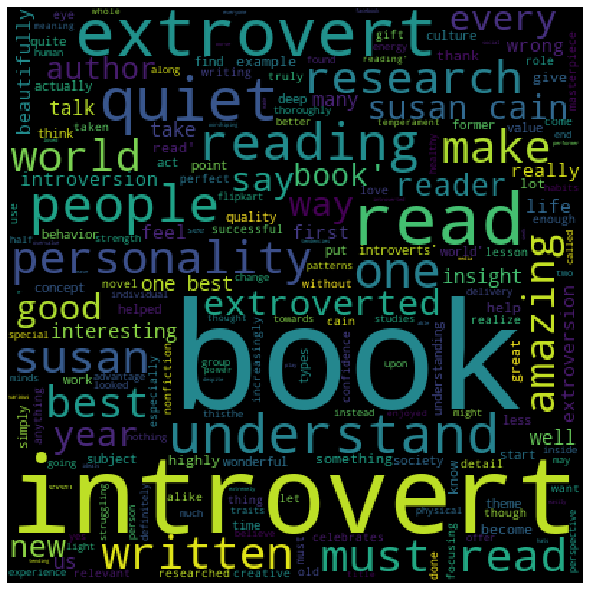

In [22]:
generate_wordcloud(str(data_set_final[(data_set_final['Star_count'] == 5)]['Review'].values))

In [23]:
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diwak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#First param is data, 2nd is n-gram, 3rd is top n values needed
def extract_ngrams(data, num, top_n):    
    
    ngrams_Xstar = ngrams(nltk.word_tokenize(data), num)
    ngrams_XFreq = collections.Counter(ngrams_Xstar)
    word_list = ngrams_XFreq.most_common(top_n)
    return(word_list)
 
output_review_list = extract_ngrams(str(data_set_final[(data_set_final['Star_count'] > 2)]['Review'].values),2,3)

print(text_cleaner(str(output_review_list[0])))
print(text_cleaner(str(output_review_list[1])))
print(text_cleaner(str(output_review_list[2])))

must read 
susan cain 
read introverts 


In [48]:
#Function to capture an input from a text area

bt = Button(label='Click me')

def change_click():
    print('I was clicked')

bt.on_click(change_click)

show(bt)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    http://bokeh.pydata.org/en/latest/docs/user_guide/server.html

